In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from mplsoccer import VerticalPitch

## Data

The csv file contains over 25 thousand shots made by all EFL Championship players from the past two seasons 2020/21 & 2021/22


In [28]:
df = pd.read_csv('efl_championship_shots_07022022-2.csv', index_col=0)

In [29]:
df.head()

,matchId,playerName,playerId,min,x,y,shotType,blocked,onTarget,ownGoal,xG,xGOT,eventType,teamId,teamColor,date,teamName
0,3414545,Daryl Horgan,253356,2,101.681034,37.431250,LeftFoot,False,False,False,0.7994,NaN,Miss,8676,#083868,2020-09-12 13:30:00,Wycombe Wanderers
1,3414545,Joe Jacobson,28892,10,58.193332,48.554906,LeftFoot,False,False,False,0.0290,NaN,Miss,8676,#083868,2020-09-12 13:30:00,Wycombe Wanderers
2,3414545,Kieran Sadlier,614458,12,73.024756,29.967858,RightFoot,False,True,False,0.0484,0.3966,AttemptSaved,8119,#DA291C,2020-09-12 13:30:00,Rotherham United
3,3414545,Michael Ihiekwe,280865,12,94.385966,29.715713,Header,False,False,False,0.0414,NaN,Miss,8119,#DA291C,2020-09-12 13:30:00,Rotherham United
4,3414545,Chiedozie Ogbene,674009,28,91.900002,23.929172,LeftFoot,True,True,False,0.0499,NaN,AttemptSaved,8119,#DA291C,2020-09-12 13:30:00,Rotherham United


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25212 entries, 0 to 25211
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   matchId     25212 non-null  int64  
 1   playerName  25212 non-null  object 
 2   playerId    25212 non-null  int64  
 3   min         25212 non-null  int64  
 4   x           25212 non-null  float64
 5   y           25212 non-null  float64
 6   shotType    25212 non-null  object 
 7   blocked     25212 non-null  bool   
 8   onTarget    25212 non-null  bool   
 9   ownGoal     25212 non-null  bool   
 10  xG          25121 non-null  float64
 11  xGOT        8145 non-null   float64
 12  eventType   25212 non-null  object 
 13  teamId      25212 non-null  int64  
 14  teamColor   25212 non-null  object 
 15  date        25212 non-null  object 
 16  teamName    25212 non-null  object 
dtypes: bool(3), float64(4), int64(4), object(6)
memory usage: 3.0+ MB


In [8]:
df.columns

Index(['matchId', 'playerName', 'playerId', 'min', 'x', 'y', 'shotType',
       'blocked', 'onTarget', 'ownGoal', 'xG', 'xGOT', 'eventType', 'teamId',
       'teamColor', 'date', 'teamName'],
      dtype='object')

In [12]:
for col in ['shotType','blocked', 'onTarget',
            'ownGoal', 'eventType', 'date', 'teamName']:
    print(f"{col} column has {df[col].nunique()} values and they are\n{df[col].unique()}")

shotType column has 4 values and they are
['LeftFoot' 'RightFoot' 'Header' 'OtherBodyParts']
blocked column has 2 values and they are
[False  True]
onTarget column has 2 values and they are
[False  True]
ownGoal column has 2 values and they are
[False  True]
eventType column has 4 values and they are
['Miss' 'AttemptSaved' 'Goal' 'Post']
date column has 368 values and they are
['2020-09-12 13:30:00' '2020-09-12 16:00:00' '2020-09-11 20:45:00'
 '2020-09-18 20:45:00' '2020-09-19 13:30:00' '2020-09-19 16:00:00'
 '2020-09-26 13:30:00' '2020-09-26 16:00:00' '2020-09-20 15:00:00'
 '2020-09-27 17:00:00' '2020-09-25 20:45:00' '2020-10-02 20:45:00'
 '2020-09-27 14:00:00' '2020-10-03 13:30:00' '2020-10-03 16:00:00'
 '2020-10-04 16:00:00' '2020-10-16 20:45:00' '2020-10-17 16:00:00'
 '2020-10-04 15:00:00' '2020-10-18 13:00:00' '2020-10-20 20:45:00'
 '2020-10-20 21:00:00' '2020-10-21 20:45:00' '2020-10-23 20:45:00'
 '2020-10-24 16:00:00' '2020-10-24 13:30:00' '2020-10-30 20:45:00'
 '2020-10-27 20:0

## Pitch

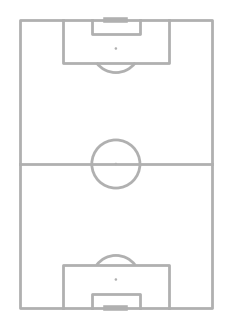

In [18]:
fig = plt.figure(figsize=(4,4), dpi=100)
ax = fig.add_subplot(111)

pitch = VerticalPitch()
pitch.draw(ax=ax)

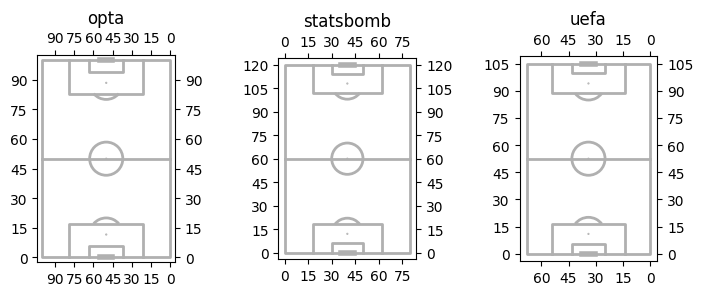

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,5), dpi=100)

providers=['opta', 'statsbomb', 'uefa']
for i, ax in enumerate(axes):
    pitch = VerticalPitch(pitch_type=providers[i], axis=True, label=True, tick=True)
    pitch.draw(ax=ax)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(15))

    ax.set_title(providers[i])

plt.subplots_adjust(wspace=0.75)

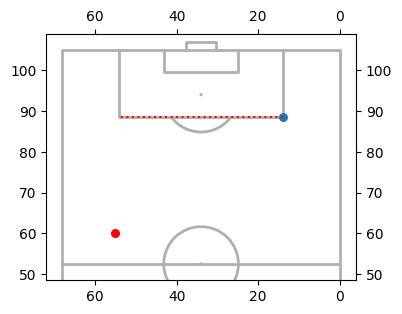

In [50]:
fig = plt.figure(figsize=(4,4), dpi=100)
ax = fig.add_subplot(111)

pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    axis=True,
    label=True,
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

ax.scatter(13.84,88.5, s=30)
pitch.scatter(60,55, s=30, color='red', ax=ax)

x_start = 13.84
x_end = 68 - x_start
y = 105 - 16.5

ax.plot([x_start, x_end], [y, y], color='red', ls=":")

In [12]:
def pitch_division(ax, grid=False):
    pitch = VerticalPitch(
        pitch_type = "uefa",
        goal_type = "box",
        half = True,
        linewidth = 1.25,
        line_color = "black"
    )

    pitch.draw(ax = ax)

    if grid:
        x_lines = [68 - 6.8*i for i in range(1,10)]
        y_lines = [105 - 5.5*i for i in range(1,10)]

        for i in x_lines:
            ax.plot([i,i], [45,105], ls = "--", color = "lightgrey",
                   lw=0.75, zorder=-1)

        for i in y_lines:
            ax.plot([68,0], [i,i], ls = "--", color = "lightgrey",
                   lw=0.75, zorder=-1)

    return ax

<Axes: >

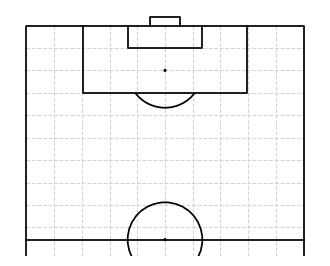

In [71]:
fig = plt.subplots(figsize=(4,4), dpi=100)
ax = plt.subplot(111)

pitch_division(ax, grid=True)

## Data

In [72]:
len(df)

25212

In [30]:
df = df[df.date >= "2021-08-06"].reset_index(drop = True)
df.rename(columns={'x':'y', 'y':'x'}, inplace=True)

In [31]:
x_lines = [68] + [68 - 6.8*i for i in range(1,10)] + [0]
y_lines = [105] + [105 - 5.5*i for i in range(1,10)] + [45]
x_lines.sort()
y_lines.sort()
print(x_lines)
print(y_lines)

[0, 6.800000000000004, 13.600000000000001, 20.4, 27.200000000000003, 34.0, 40.8, 47.6, 54.4, 61.2, 68]
[45, 55.5, 61.0, 66.5, 72.0, 77.5, 83.0, 88.5, 94.0, 99.5, 105]


In [32]:
df['bins_x'] = pd.cut(df['x'], bins = x_lines)
df['bins_y'] = pd.cut(df['y'], bins = y_lines)

In [33]:
df.loc[:, ['x', 'bins_x', 'y', 'bins_y']].head()

,x,bins_x,y,bins_y
0,40.049286,"(34.0, 40.8]",91.699997,"(88.5, 94.0]"
1,37.431250,"(34.0, 40.8]",98.052629,"(94.0, 99.5]"
2,32.856250,"(27.2, 34.0]",96.991227,"(94.0, 99.5]"
3,45.542165,"(40.8, 47.6]",94.385966,"(94.0, 99.5]"
4,35.677501,"(34.0, 40.8]",97.666670,"(94.0, 99.5]"


In [34]:
df_teams = (
    df.groupby(
        ["bins_x", "bins_y", "teamName", "teamId", "teamColor"], observed=True
    )['xGOT'].sum().reset_index()
)

df_teams = (
    df_teams.
    sort_values(by = ["bins_y", "bins_x"]).
    reset_index(drop = True)
)

In [35]:
df_teams.head(20)

,bins_x,bins_y,teamName,teamId,teamColor,xGOT
0,"(27.2, 34.0]","(45.0, 55.5]",AFC Bournemouth,8678,#901818,0.0000
1,"(27.2, 34.0]","(45.0, 55.5]",Fulham,9879,#000000,0.0161
2,"(27.2, 34.0]","(45.0, 55.5]",Millwall,10004,#003078,0.0000
3,"(27.2, 34.0]","(45.0, 55.5]",Stoke City,10194,#E03A3E,0.2745
4,"(27.2, 34.0]","(45.0, 55.5]",West Bromwich Albion,8659,#1a237e,0.0000
5,"(34.0, 40.8]","(45.0, 55.5]",Blackpool,8483,#A83008,0.0000
6,"(34.0, 40.8]","(45.0, 55.5]",Millwall,10004,#003078,0.1461
7,"(40.8, 47.6]","(45.0, 55.5]",Blackburn Rovers,8655,#1A51AE,0.0000
8,"(40.8, 47.6]","(45.0, 55.5]",Fulham,9879,#000000,0.0123
9,"(6.8, 13.6]","(55.5, 61.0]",Fulham,9879,#000000,0.0000


In [36]:
example_df = df_teams[df_teams.teamName == 'Luton Town']
total = example_df.xGOT.sum()

example_df = example_df.assign(xGOT_share = example_df['xGOT']/total)
example_df = example_df.assign(xGOT_scaled = lambda x : x.xGOT_share/x.xGOT_share.max())


In [37]:
example_df.head()

,bins_x,bins_y,teamName,teamId,teamColor,xGOT,xGOT_share,xGOT_scaled
27,"(40.8, 47.6]","(61.0, 66.5]",Luton Town,8346,#002858,0.0000,0.000000,0.000000
33,"(13.6, 20.4]","(66.5, 72.0]",Luton Town,8346,#002858,0.0000,0.000000,0.000000
41,"(27.2, 34.0]","(66.5, 72.0]",Luton Town,8346,#002858,0.0000,0.000000,0.000000
52,"(34.0, 40.8]","(66.5, 72.0]",Luton Town,8346,#002858,0.0275,0.000477,0.002315
63,"(47.6, 54.4]","(66.5, 72.0]",Luton Town,8346,#002858,0.0273,0.000474,0.002298


## Viz

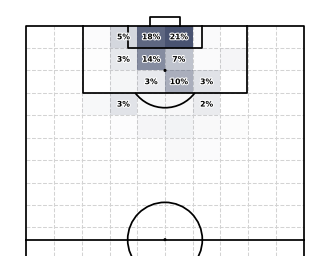

In [41]:
fig = plt.figure(figsize=(4,4), dpi=100)
ax = plt.subplot(111)

pitch_division(ax, grid=True)

index = 0
for X, Y in zip(example_df['bins_x'], example_df['bins_y']):
    ax.fill_between(
        x = [X.left, X.right],
        y1 = Y.left,
        y2 = Y.right,
        color = "#495371",
        alpha = example_df["xGOT_scaled"].iloc[index],
        zorder = -1,
        lw = 0
    )

    if example_df["xGOT_share"].iloc[index] > 0.02:
        text = ax.annotate(
            text = f"{example_df['xGOT_share'].iloc[index]:.0%}",
            xy = ((X.right + X.left)/2, (Y.right + Y.left)/2),
            ha = "center",
            va = "center",
            size = 5.5,
            color = "black",
            weight = "bold",
            zorder = 3
        )

        text.set_path_effects(
            [path_effects.Stroke(linewidth = 1.5, foreground = "white"), path_effects.Normal()]
        )

    index += 1

## Data Viz

In [47]:
def xGOT_plot(ax, grid, teamId, data = df_teams):
    df = data.copy()
    df = df[df.teamId == teamId]
    total = df.xGOT.sum()

    df = df.assign(xGOT_share = df['xGOT']/total)
    df = df.assign(xGOT_scaled = lambda x : x.xGOT_share/x.xGOT_share.max())

    pitch_division(ax, grid = grid)

    index = 0
    for X, Y in zip(df['bins_x'], df['bins_y']):
        ax.fill_between(
            x = [X.left, X.right],
            y1 = Y.left,
            y2 = Y.right,
            color = "#495371",
            alpha = df["xGOT_scaled"].iloc[index],
            zorder = -1,
            lw = 0
        )
    
        if df["xGOT_share"].iloc[index] > 0.02:
            text = ax.annotate(
                text = f"{df['xGOT_share'].iloc[index]:.0%}",
                xy = ((X.right + X.left)/2, (Y.right + Y.left)/2),
                ha = "center",
                va = "center",
                size = 5.5,
                color = "black",
                weight = "bold",
                zorder = 3
            )
    
            text.set_path_effects(
                [path_effects.Stroke(linewidth = 1.5, foreground = "white"), path_effects.Normal()]
            )
    
        index += 1
    ax.set_title(df['teamName'].iloc[0], loc = 'left')
    return ax


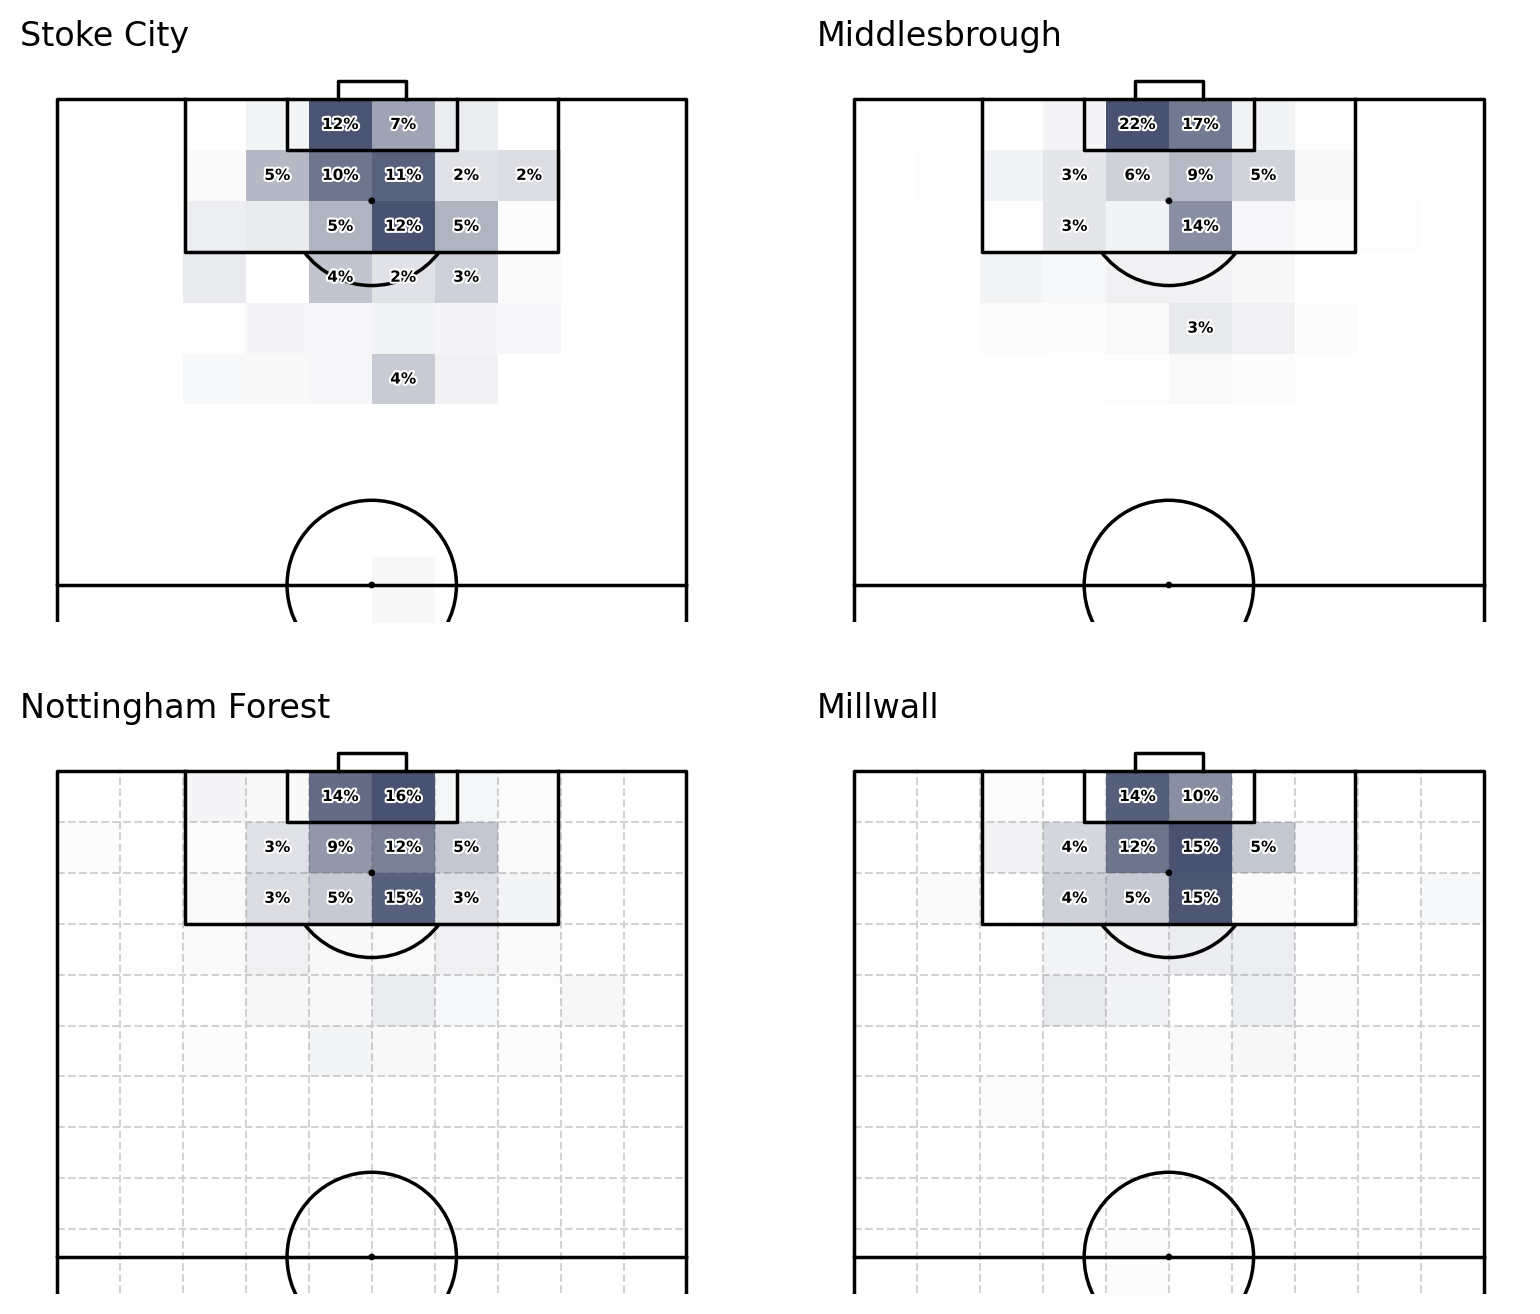

In [49]:
fig = plt.figure(figsize=(12,8), dpi = 200)

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

xGOT_plot(ax1, False, 10194, data = df_teams)
xGOT_plot(ax2, False, 8549, data = df_teams)
xGOT_plot(ax3, True, 10203, data = df_teams)
xGOT_plot(ax4, True, 10004, data = df_teams)

plt.subplots_adjust(wspace = -0.25)